In [1]:
pip install scikit-surprise

In [2]:
from surprise import SVD
from surprise import NMF
from surprise import KNNBasic
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate

In [3]:
from google.colab import drive  #to import Google drive data

In [4]:
drive.mount('/content/drive') #to the drive data into colab cloud and enter the activation colab

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
cd /content/drive/"My Drive/AI/ml-100k"

/content/drive/My Drive/AI/ml-100k


In [6]:
import numpy as np
import pandas as pd
import seaborn  as sns
import matplotlib.pyplot as plt
import torch

In [7]:
#getting dataset with details
#For ml-100k
cols = ['UserId','MovieId','Rating','TimeStamp']
df_ml = pd.read_csv('u.data',sep = '\t',header = None,names = cols)

In [8]:
df_ml

,UserId,MovieId,Rating,TimeStamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


Text(0, 0.5, 'Number of ratings')

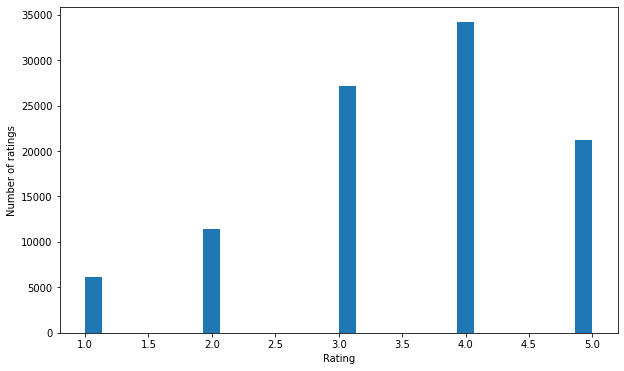

In [9]:
plt.figure(figsize=(10,6))
plt.hist(df_ml['Rating'],bins=30)
plt.xlabel('Rating')
plt.ylabel('Number of ratings')

Text(0, 0.5, 'Number of ratings')

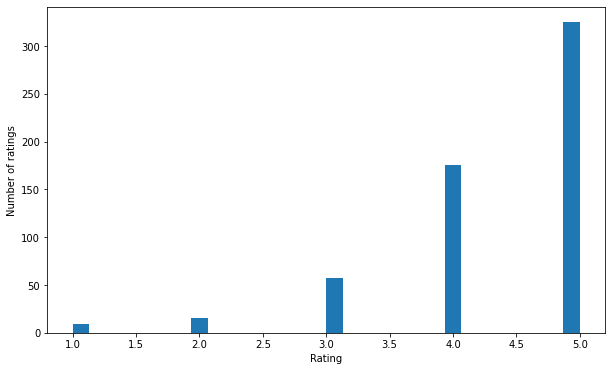

In [10]:
data_50thmovie = df_ml[df_ml['MovieId']==50]
plt.figure(figsize=(10,6))
plt.hist(data_50thmovie['Rating'],bins=30)
plt.xlabel('Rating')
plt.ylabel('Number of ratings')

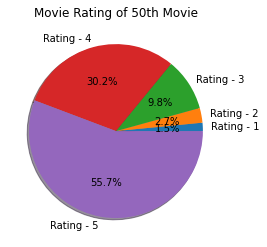

In [11]:
lst =[0,0,0,0,0]
data_50thmovie_rating = data_50thmovie['Rating'].values
for i in range(len(data_50thmovie_rating)):
    lst[data_50thmovie_rating[i]-1]+=1
plt.pie(lst,labels=['Rating - 1','Rating - 2','Rating - 3','Rating - 4','Rating - 5'],explode=(0,0,0,0,0),shadow=True,autopct='%1.1f%%')
plt.title("Movie Rating of 50th Movie")

plt.show()

In [12]:
df_jes=pd.read_csv("jester-data-1_new.csv")
df_jes=df_jes.drop(['Number of Ratings'],axis=1)

In [13]:
df_jes

,UserID,J1,J2,J3,J4,J5,J6,J7,J8,J9,J10,J11,J12,J13,J14,J15,J16,J17,J18,J19,J20,J21,J22,J23,J24,J25,J26,J27,J28,J29,J30,J31,J32,J33,J34,J35,J36,J37,J38,J39,...,J61,J62,J63,J64,J65,J66,J67,J68,J69,J70,J71,J72,J73,J74,J75,J76,J77,J78,J79,J80,J81,J82,J83,J84,J85,J86,J87,J88,J89,J90,J91,J92,J93,J94,J95,J96,J97,J98,J,J100
0,U1,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,...,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.42,NaN,NaN,NaN,-7.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.82,NaN,NaN,NaN,NaN,NaN,-5.63,NaN,NaN,NaN
1,U2,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.00,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.00,2.77,8.30,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,U3,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,NaN,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,NaN,8.25,NaN,NaN,7.48,7.28,7.28,8.93,NaN,6.17,7.28,NaN,NaN,8.98,7.33,NaN,6.17,9.08,...,6.46,7.28,NaN,NaN,7.04,7.28,NaN,7.28,8.25,NaN,NaN,NaN,NaN,NaN,NaN,8.93,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.03,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
3,U4,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,NaN,NaN,NaN,NaN,2.91,3.93,6.75,6.60,NaN,6.65,-6.12,NaN,7.57,6.21,6.65,NaN,-8.30,7.18,...,0.00,-3.69,NaN,NaN,7.82,0.24,NaN,7.28,-2.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.63,NaN,NaN,-2.33,NaN,NaN,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4,U5,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,NaN,NaN,NaN,NaN,NaN,NaN,4.13,NaN,NaN,NaN,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24978,U24979,0.44,7.43,9.08,2.33,3.20,6.75,-8.79,-0.53,-8.74,7.23,-0.53,5.63,-7.14,-4.08,-3.50,-8.20,-3.98,-9.22,-0.15,-6.46,5.63,-0.92,-2.91,-4.17,2.82,3.40,8.64,6.84,6.80,-0.87,7.38,-3.50,8.88,7.43,5.39,2.23,-0.68,3.40,-0.58,...,8.59,3.45,0.87,9.27,-4.66,5.73,-0.49,8.35,1.94,5.00,-9.66,8.98,8.98,-9.81,9.13,9.08,9.08,3.98,0.73,9.03,8.98,9.22,8.93,9.13,9.27,-1.00,-9.95,-9.90,9.13,8.83,8.83,-1.21,9.22,-6.70,8.45,9.03,6.55,8.69,8.79,7.43
24979,U24980,9.13,-8.16,8.59,9.08,0.87,-8.93,-3.50,5.78,-8.11,4.90,8.88,-8.69,-7.48,-8.83,-1.75,6.60,3.54,1.50,7.67,-0.44,9.22,8.74,9.03,9.08,8.93,3.74,3.20,-9.17,-8.98,8.79,-7.67,-3.06,9.13,8.40,-0.63,-7.18,0.58,8.88,9.27,...,2.77,8.11,-7.96,8.93,-0.87,-5.87,8.88,-1.12,-8.74,8.74,NaN,NaN,NaN,NaN,NaN,4.90,NaN,NaN,NaN,NaN,-0.29,0.92,-0.78,0.15,-0.10,0.00,-0.19,-0.87,-1.36,-0.58,-1.17,-5.73,-1.46,0.24,9.22,-8.20,-7.23,-8.59,9.13,8.45
24980,U24981,NaN,NaN,NaN,NaN,-7.77,NaN,6.70,-6.75,NaN,NaN,NaN,NaN,-6.46,-1.65,-6.80,-6.41,-6.00,7.23,6.75,-6.00,6.55,NaN,NaN,NaN,NaN,0.49,-0.53,-6.94,-0.49,NaN,6.46,-0.53,NaN,NaN,-7.86,-0.34,NaN,-6.94,NaN,...,0.49,-0.24,NaN,NaN,-3.11,-6.65,NaN,-0.58,6.31,NaN,NaN,-7.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24981,U24982,NaN,NaN,NaN,NaN,-9.71,NaN,4.56,-8.30,NaN,NaN,NaN,NaN,-9.47,NaN,3.45,-0.92,-4.51,-4.13,-5.73,-9.51,2

In [14]:
df2=df_jes
df2

,UserID,J1,J2,J3,J4,J5,J6,J7,J8,J9,J10,J11,J12,J13,J14,J15,J16,J17,J18,J19,J20,J21,J22,J23,J24,J25,J26,J27,J28,J29,J30,J31,J32,J33,J34,J35,J36,J37,J38,J39,...,J61,J62,J63,J64,J65,J66,J67,J68,J69,J70,J71,J72,J73,J74,J75,J76,J77,J78,J79,J80,J81,J82,J83,J84,J85,J86,J87,J88,J89,J90,J91,J92,J93,J94,J95,J96,J97,J98,J,J100
0,U1,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,...,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.42,NaN,NaN,NaN,-7.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.82,NaN,NaN,NaN,NaN,NaN,-5.63,NaN,NaN,NaN
1,U2,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.00,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.00,2.77,8.30,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,U3,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,NaN,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,NaN,8.25,NaN,NaN,7.48,7.28,7.28,8.93,NaN,6.17,7.28,NaN,NaN,8.98,7.33,NaN,6.17,9.08,...,6.46,7.28,NaN,NaN,7.04,7.28,NaN,7.28,8.25,NaN,NaN,NaN,NaN,NaN,NaN,8.93,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.03,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
3,U4,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,NaN,NaN,NaN,NaN,2.91,3.93,6.75,6.60,NaN,6.65,-6.12,NaN,7.57,6.21,6.65,NaN,-8.30,7.18,...,0.00,-3.69,NaN,NaN,7.82,0.24,NaN,7.28,-2.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.63,NaN,NaN,-2.33,NaN,NaN,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4,U5,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,NaN,NaN,NaN,NaN,NaN,NaN,4.13,NaN,NaN,NaN,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24978,U24979,0.44,7.43,9.08,2.33,3.20,6.75,-8.79,-0.53,-8.74,7.23,-0.53,5.63,-7.14,-4.08,-3.50,-8.20,-3.98,-9.22,-0.15,-6.46,5.63,-0.92,-2.91,-4.17,2.82,3.40,8.64,6.84,6.80,-0.87,7.38,-3.50,8.88,7.43,5.39,2.23,-0.68,3.40,-0.58,...,8.59,3.45,0.87,9.27,-4.66,5.73,-0.49,8.35,1.94,5.00,-9.66,8.98,8.98,-9.81,9.13,9.08,9.08,3.98,0.73,9.03,8.98,9.22,8.93,9.13,9.27,-1.00,-9.95,-9.90,9.13,8.83,8.83,-1.21,9.22,-6.70,8.45,9.03,6.55,8.69,8.79,7.43
24979,U24980,9.13,-8.16,8.59,9.08,0.87,-8.93,-3.50,5.78,-8.11,4.90,8.88,-8.69,-7.48,-8.83,-1.75,6.60,3.54,1.50,7.67,-0.44,9.22,8.74,9.03,9.08,8.93,3.74,3.20,-9.17,-8.98,8.79,-7.67,-3.06,9.13,8.40,-0.63,-7.18,0.58,8.88,9.27,...,2.77,8.11,-7.96,8.93,-0.87,-5.87,8.88,-1.12,-8.74,8.74,NaN,NaN,NaN,NaN,NaN,4.90,NaN,NaN,NaN,NaN,-0.29,0.92,-0.78,0.15,-0.10,0.00,-0.19,-0.87,-1.36,-0.58,-1.17,-5.73,-1.46,0.24,9.22,-8.20,-7.23,-8.59,9.13,8.45
24980,U24981,NaN,NaN,NaN,NaN,-7.77,NaN,6.70,-6.75,NaN,NaN,NaN,NaN,-6.46,-1.65,-6.80,-6.41,-6.00,7.23,6.75,-6.00,6.55,NaN,NaN,NaN,NaN,0.49,-0.53,-6.94,-0.49,NaN,6.46,-0.53,NaN,NaN,-7.86,-0.34,NaN,-6.94,NaN,...,0.49,-0.24,NaN,NaN,-3.11,-6.65,NaN,-0.58,6.31,NaN,NaN,-7.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24981,U24982,NaN,NaN,NaN,NaN,-9.71,NaN,4.56,-8.30,NaN,NaN,NaN,NaN,-9.47,NaN,3.45,-0.92,-4.51,-4.13,-5.73,-9.51,2

In [15]:
colname=df2.columns[1:101]

In [16]:
df3=(df_jes.values)   #df2[:,1:102]

In [17]:
ratings=(df3[:,1:102].ravel())
ratings.size

2498300

In [18]:
a=[]
for i in range (1,24984):
    a=a+[i]

In [19]:
b=[]
for i in range(100):
  b.extend(a)

In [20]:
b.sort()

In [21]:
jokes=[]
for i in range (1,101):
    jokes=jokes+[str(i)]

In [22]:
users=b   #length=2498300
movies=jokes*24983   #length=2498300 

ratings_dict={'userID':users,
              'itemID':movies,
              'rating':ratings}

df_jes=pd.DataFrame(ratings_dict)

In [23]:
df_jes

,userID,itemID,rating
0,1,1,-7.82
1,1,2,8.79
2,1,3,-9.66
3,1,4,-8.16
4,1,5,-7.52
...,...,...,...
2498295,24983,96,NaN
2498296,24983,97,NaN
2498297,24983,98,NaN
2498298,24983,99,NaN


In [24]:
df_jes.dropna(inplace=True)

In [25]:
df_jes

,userID,itemID,rating
0,1,1,-7.82
1,1,2,8.79
2,1,3,-9.66
3,1,4,-8.16
4,1,5,-7.52
...,...,...,...
2498267,24983,68,7.48
2498268,24983,69,5.15
2498269,24983,70,3.2
2498270,24983,71,6.26


Text(0, 0.5, 'Number of ratings')

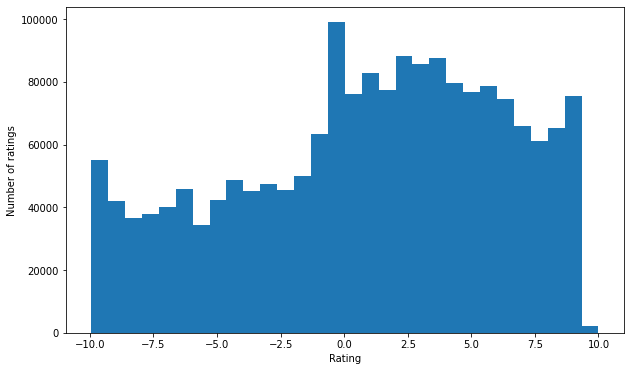

In [26]:
plt.figure(figsize=(10,6))
plt.hist(df_jes['rating'],bins=30)
plt.xlabel('Rating')
plt.ylabel('Number of ratings')

Text(0, 0.5, 'Number of ratings')

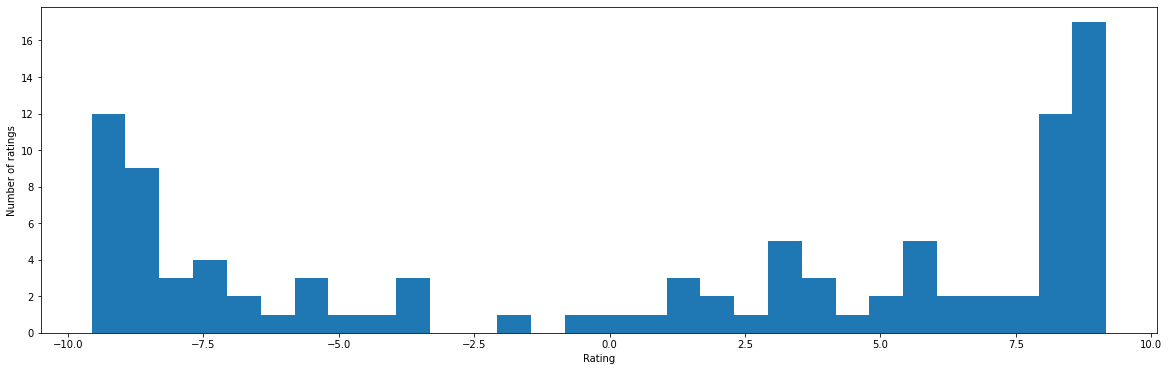

In [27]:
data_50thmovie = df_jes[df_jes['userID']==50]
plt.figure(figsize=(20,6))
plt.hist(data_50thmovie['rating'],bins=30)
plt.xlabel('Rating')
plt.ylabel('Number of ratings')

In [28]:
#remove this
newdf_jes=df_jes.iloc[0:1800005]
newdf_jes

,userID,itemID,rating
0,1,1,-7.82
1,1,2,8.79
2,1,3,-9.66
3,1,4,-8.16
4,1,5,-7.52
...,...,...,...
2483747,24838,48,-7.04
2483748,24838,49,-1.07
2483749,24838,50,9.08
2483750,24838,51,-3.79


In [29]:
#write df in place of newdf for final run
reader=Reader(rating_scale=(-10,10))
trainset=Dataset.load_from_df(df_jes[['userID','itemID','rating']],reader).build_full_trainset

In [30]:
def make_report(svd_res,knn_res,nmf_res):
    lst = ['test_rmse','test_mae','fit_time','test_time']
    svd_lst=[]
    for i in range(len(lst)):
        svd_lst.append(np.mean(svd_res[lst[i]]))
    knn_lst=[]
    for i in range(len(lst)):
        knn_lst.append(np.mean(knn_res[lst[i]]))
    nmf_lst=[]
    for i in range(len(lst)):
        nmf_lst.append(np.mean(nmf_res[lst[i]]))

    print(svd_lst)
    print(knn_lst)
    print(nmf_lst)
    
    W = ['RMSE','MAE','Fit Time','Test Time']
    X = svd_lst;
    Y = knn_lst;
    Z = nmf_lst;
    X_axis = np.arange(len(W))
    plt.bar(X_axis - 0.2, X, 0.2, label = 'SVD')
    plt.bar(X_axis, Y, 0.2, label = 'KNN')
    plt.bar(X_axis + 0.2, Z, 0.2, label = 'NMF')
    
    plt.xticks(X_axis, W)
    plt.title("Comparision of Parameters")
    plt.legend()
    plt.show()

In [31]:
reader=Reader(rating_scale=(1,5))
trainset=Dataset.load_from_df(df_ml[['UserId','MovieId','Rating']],reader).build_full_trainset()
data=Dataset.load_from_df(df_ml[['UserId','MovieId','Rating']],reader)

In [32]:
algo = SVD()
algo.fit(trainset)
svd_res = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9428  0.9345  0.9322  0.9356  0.9375  0.9365  0.0036  
MAE (testset)     0.7418  0.7362  0.7370  0.7370  0.7381  0.7380  0.0020  
Fit time          4.97    5.08    5.13    5.01    4.99    5.04    0.06    
Test time         0.20    0.18    0.37    0.15    0.17    0.21    0.08    


In [33]:
algo = KNNBasic()
algo.fit(trainset)
knn_res = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9818  0.9754  0.9731  0.9852  0.9811  0.9793  0.0044  
MAE (testset)     0.7777  0.7702  0.7684  0.7771  0.7726  0.7732  0.0037  
Fit time          0.40    0.49    0.45    0.46    0.45    0.45    0.03    
Test time         4.23    4.35    4.49    4.36    4.50    4.38    0.10    


In [34]:
algo = NMF()
algo.fit(trainset)
nmf_res = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9623  0.9608  0.9641  0.9617  0.9667  0.9631  0.0021  
MAE (testset)     0.7567  0.7550  0.7617  0.7545  0.7577  0.7571  0.0026  
Fit time          6.10    6.45    5.90    5.79    5.96    6.04    0.23    
Test time         0.13    0.13    0.42    0.12    0.34    0.23    0.13    


[0.9365155588160166, 0.7380352376211935, 5.037111043930054, 0.21470561027526855]
[0.9793163189046641, 0.7731995418668911, 0.4489152908325195, 4.384547853469849]
[0.9631242834346155, 0.7571214500423173, 6.040987825393676, 0.23012046813964843]


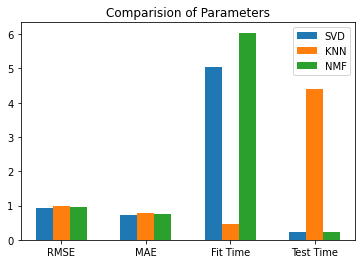

In [35]:
make_report(svd_res,knn_res,nmf_res)